In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("polynomial_regression_data.csv")
data

,sno,Temperature,Pressure
0,1,0.000000,0.000000e+00
1,2,1.010101,2.061220e-10
2,3,2.020202,1.648976e-09
3,4,3.030303,5.565295e-09
4,5,4.040404,1.319181e-08
...,...,...,...
95,96,95.959596,1.767239e-04
96,97,96.969697,1.823636e-04
97,98,97.979798,1.881220e-04
98,99,98.989899,1.940004e-04


In [4]:
data.isna().sum()

sno            0
Temperature    0
Pressure       0
dtype: int64

In [5]:
data.shape

(100, 3)

In [6]:
data.columns

Index(['sno', 'Temperature', 'Pressure'], dtype='object')

In [9]:
X=data[["Temperature"]]
y=data["Pressure"]

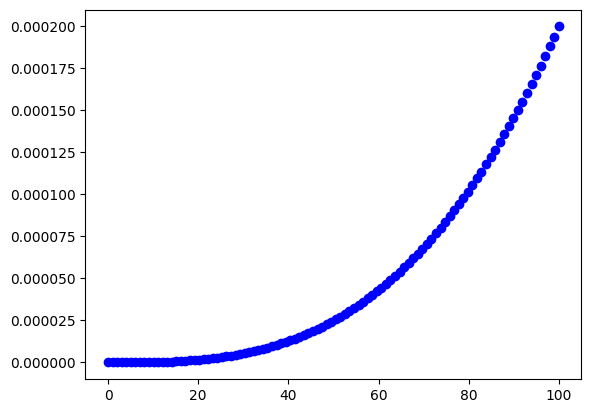

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X,y,color="blue")
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [16]:
x_train

,Temperature
55,55.555556
88,88.888889
26,26.262626
42,42.424242
69,69.696970
...,...
60,60.606061
71,71.717172
14,14.141414
92,92.929293


In [13]:
poly=PolynomialFeatures(degree=4)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)

In [17]:
x_train_poly

array([[1.00000000e+00, 5.55555556e+01, 3.08641975e+03, 1.71467764e+05,
        9.52598689e+06],
       [1.00000000e+00, 8.88888889e+01, 7.90123457e+03, 7.02331962e+05,
        6.24295077e+07],
       [1.00000000e+00, 2.62626263e+01, 6.89725538e+02, 1.81140040e+04,
        4.75721318e+05],
       [1.00000000e+00, 4.24242424e+01, 1.79981635e+03, 7.63558450e+04,
        3.23933888e+06],
       [1.00000000e+00, 6.96969697e+01, 4.85766758e+03, 3.38564710e+05,
        2.35969344e+07],
       [1.00000000e+00, 1.51515152e+01, 2.29568411e+02, 3.47830926e+03,
        5.27016555e+04],
       [1.00000000e+00, 4.04040404e+01, 1.63248648e+03, 6.59590497e+04,
        2.66501211e+06],
       [1.00000000e+00, 9.69696970e+01, 9.40312213e+03, 9.11817904e+05,
        8.84187058e+07],
       [1.00000000e+00, 9.09090909e+00, 8.26446281e+01, 7.51314801e+02,
        6.83013455e+03],
       [1.00000000e+00, 7.27272727e+01, 5.28925620e+03, 3.84673178e+05,
        2.79762311e+07],
       [1.00000000e+00, 1.1111

In [14]:
#train
model=LinearRegression()
model.fit(x_train_poly,y_train)

#predict
y_train_pred=model.predict(x_train_poly)
y_test_pred=model.predict(x_test_poly)

In [15]:
# Step 7: Evaluation
from sklearn.metrics import mean_squared_error, r2_score
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train MSE: {mse_train:.6f}, R²: {r2_train:.6f}")
print(f"Test MSE: {mse_test:.6f}, R²: {r2_test:.6f}")

Train MSE: 0.000000, R²: 1.000000
Test MSE: 0.000000, R²: 1.000000


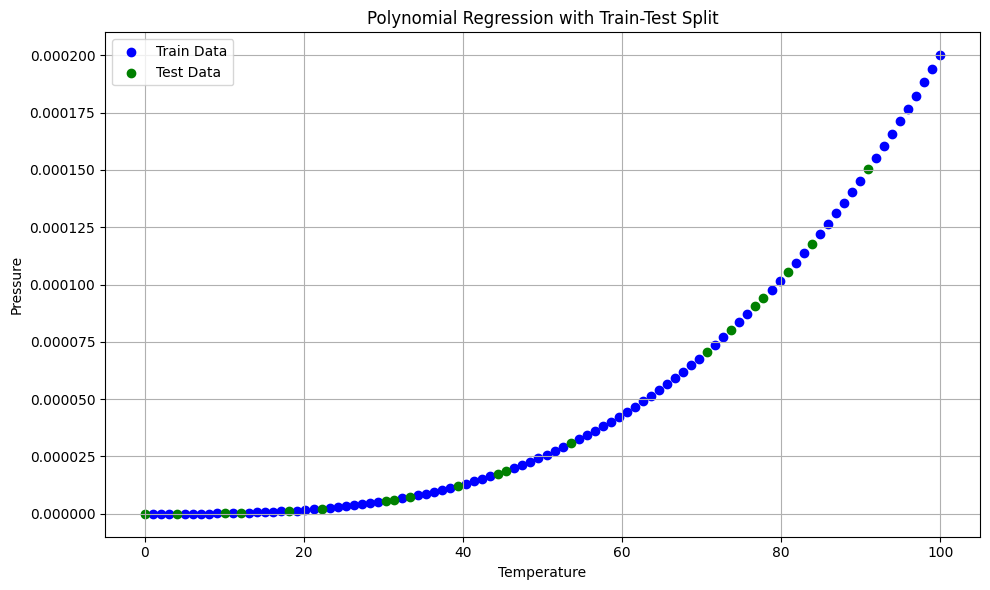

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color="blue", label="Train Data")
plt.scatter(x_test, y_test, color="green", label="Test Data")
plt.title("Polynomial Regression with Train-Test Split")
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\RENUKA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


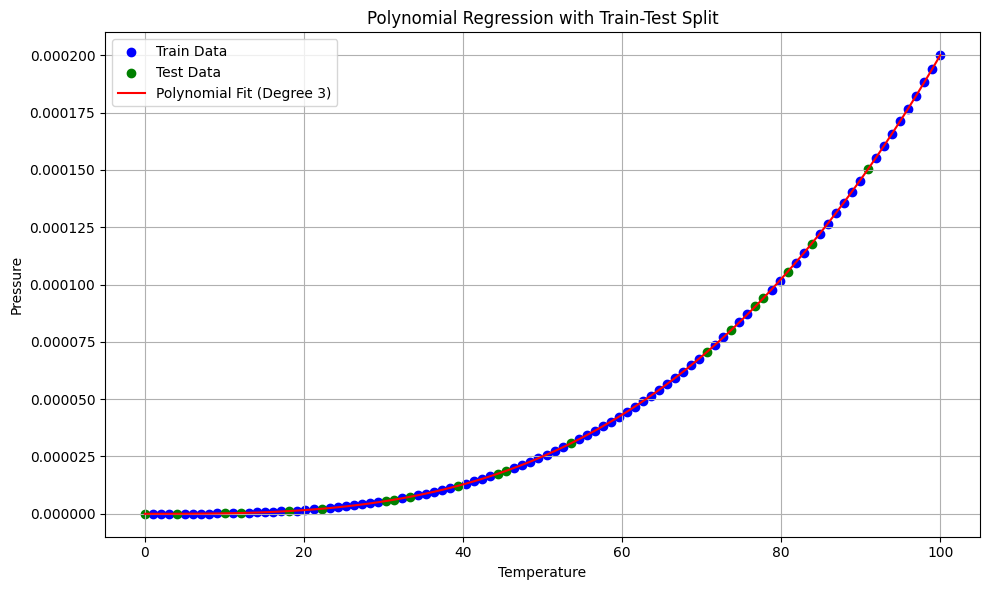

In [21]:
# Step 8: Visualization
# Sort for smooth plotting
X_sorted = np.sort(X.values.flatten())
X_sorted_poly = poly.transform(X_sorted.reshape(-1, 1))
y_sorted_pred = model.predict(X_sorted_poly)

plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color="blue", label="Train Data")
plt.scatter(x_test, y_test, color="green", label="Test Data")
plt.plot(X_sorted, y_sorted_pred, color="red", label="Polynomial Fit (Degree 3)")
plt.title("Polynomial Regression with Train-Test Split")
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()